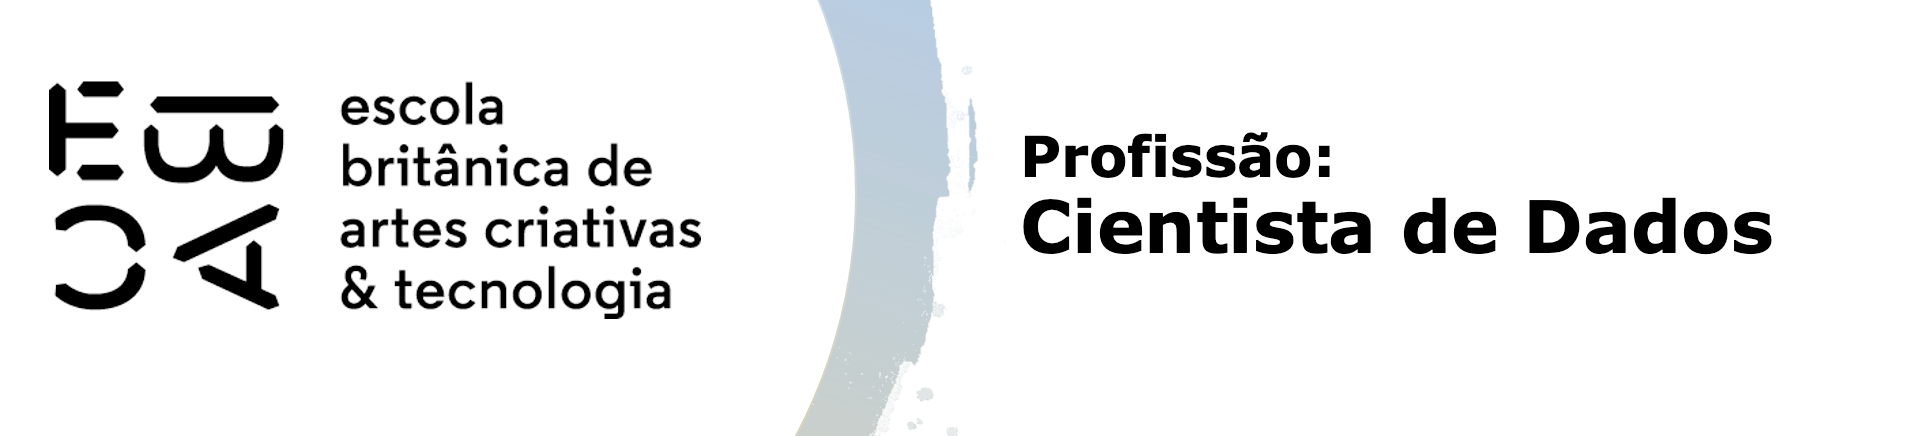

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from ydata_profiling import ProfileReport
from tqdm import tqdm
from IPython.display import display

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

Não há missing values.

In [6]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 156.88it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Não há missing values entre os dados estudados. Entretanto, há uma grande quantidade de dados numéricos iguais a 0, variando entre, aproximadamente 9% dos dados da variável ProductRelated_Duration à, aproximadamente, 90% dos dados de SpecialDay. A distribuição dos dados observados segue uma padronização entre os valores não nulos, estando distribuidos de forma semelhantes e/ou havendo uma distribuição muito semelhante a uma regressão linear.<br>
Percebemos uma grande variabilidade dos valores de tempo de duração de visitas no site, considerando a descrição das variáveis entende-se que essa diferença entre valores é comum e não é nescessário uma padronização deles.<br>
Entretanto o valor de tipo de visitantes (novos visitantes, visitantes recorrentes ou outros ) tem poucas repostas como "others" (85) , então, podemos considerar esse valor como irrelevante, e os exluirei, uma vez que essa resposta não parece ter significado de importância. Assim reduzirei as possibilidades de respostas para essa pergunta e transformarei em boolean, também trocando o nome da coluna para New_Visitor <br>
Também temos a coluna de meses que pode ser transformada, com um dicionário em inteiros, de  uma forma que seja de fácil entendimento para o leitor.

In [7]:
df[["VisitorType", "Revenue"]].value_counts()

VisitorType        Revenue
Returning_Visitor  False      9081
                   True       1470
New_Visitor        False      1272
                   True        422
Other              False        69
                   True         16
Name: count, dtype: int64

In [8]:
df = df.drop(df[df["VisitorType"] == "Other"].index)
df[["VisitorType"]].value_counts()

VisitorType      
Returning_Visitor    10551
New_Visitor           1694
Name: count, dtype: int64

In [9]:
df["VisitorType"] = (df["VisitorType"] == "New_Visitor")
df.rename(columns={"VisitorType": "New_Visitor"}, inplace=True)

In [10]:
mapa_meses = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4,
    "May": 5, "June": 6, "Jul": 7, "Aug": 8,
    "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

df["Month"] = df["Month"].map(mapa_meses)

In [11]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  New_Visitor  Weekend  Revenue  
0        1       1            1        False    False    False  
1        2       1            2        False    False    False  
2        1       9            3        False    False    False  
3        2       2            4        False    False    False  
4        3       1            4        False     True    False

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12245 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6   BounceRates              12245 non-null  float64
 7   ExitRates                12245 non-null  float64
 8   PageValues               12245 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  Month                    12245 non-null  int64  
 11  OperatingSystems         12245 non-null  int64  
 12  Browser                  12245 non-null  int64  
 13  Region                   12245 non-null  int64  
 14  TrafficType              12

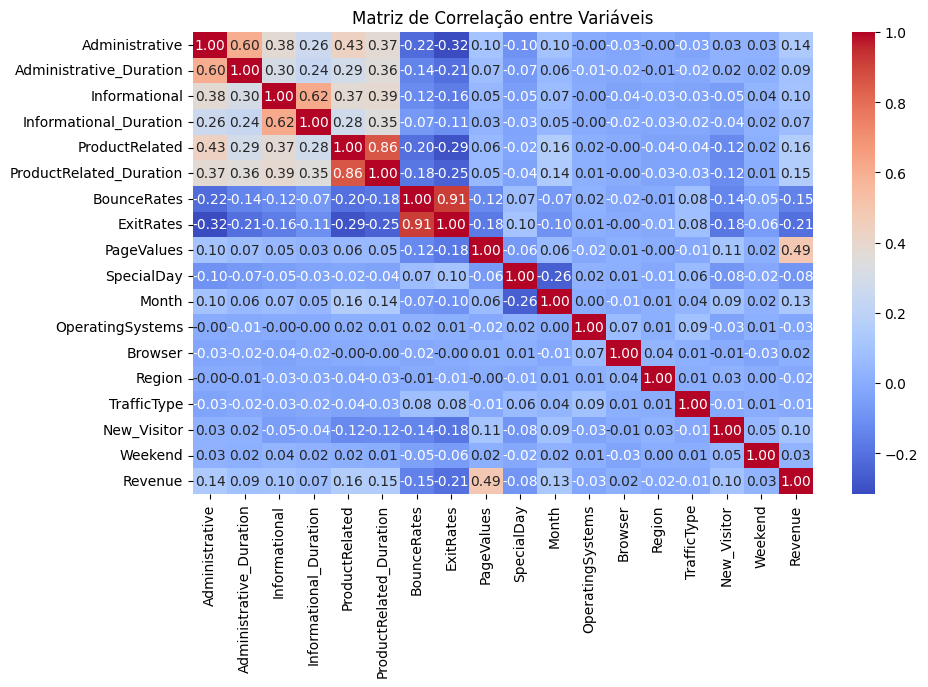

In [13]:
# Criação de heatmap para análise de relação entre variáveis
# a função corr() ignora osvalores nulos

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

Considerando o desenho da matrizde correlação encontrada percebemos uma esperada e clara forte relação entre as variáveis já esperadas, sendo a relação entre "BounceRates" x "ExitRates" o de melhor correlação (0,91), seguindo do "ProductRelated" x "ProductRelated_Duration" (0,86), "Informational" x "Informational_Duration" (0,62) e "Administrative" x "Administrative_Duration" (0,6).<br>
Além desses percebemos uma boa relação entre "PageValues" x "Revenue" (0,49), sendo essa uma relação muito interessante, entre a média de páginas visitadas para um visitante fechar a compra.<br>
O "Administrative" x "ProductRelated" tem relação de 0,43, mostrando uma relação relativamente importante entre os visitantes de páginas administrativas e de páginas de produtos.

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [14]:
# Reduzindo o número de variáveis em df, considerando o resultado da matriz de correlação anterios. Utilizarei a quantidade deacessos no lugardo tempo uma vez que entendo que essa é mais importante, 
# uma vezque uma pessoa pode acessar uma página e simplesmente esquecê-la perdida nas abas abertas.
df = df[["Administrative", "Informational", "ProductRelated", "BounceRates", "PageValues",	"SpecialDay", "Month", "OperatingSystems", "Browser", "Region", "TrafficType", "New_Visitor", "Weekend", "Revenue"]]

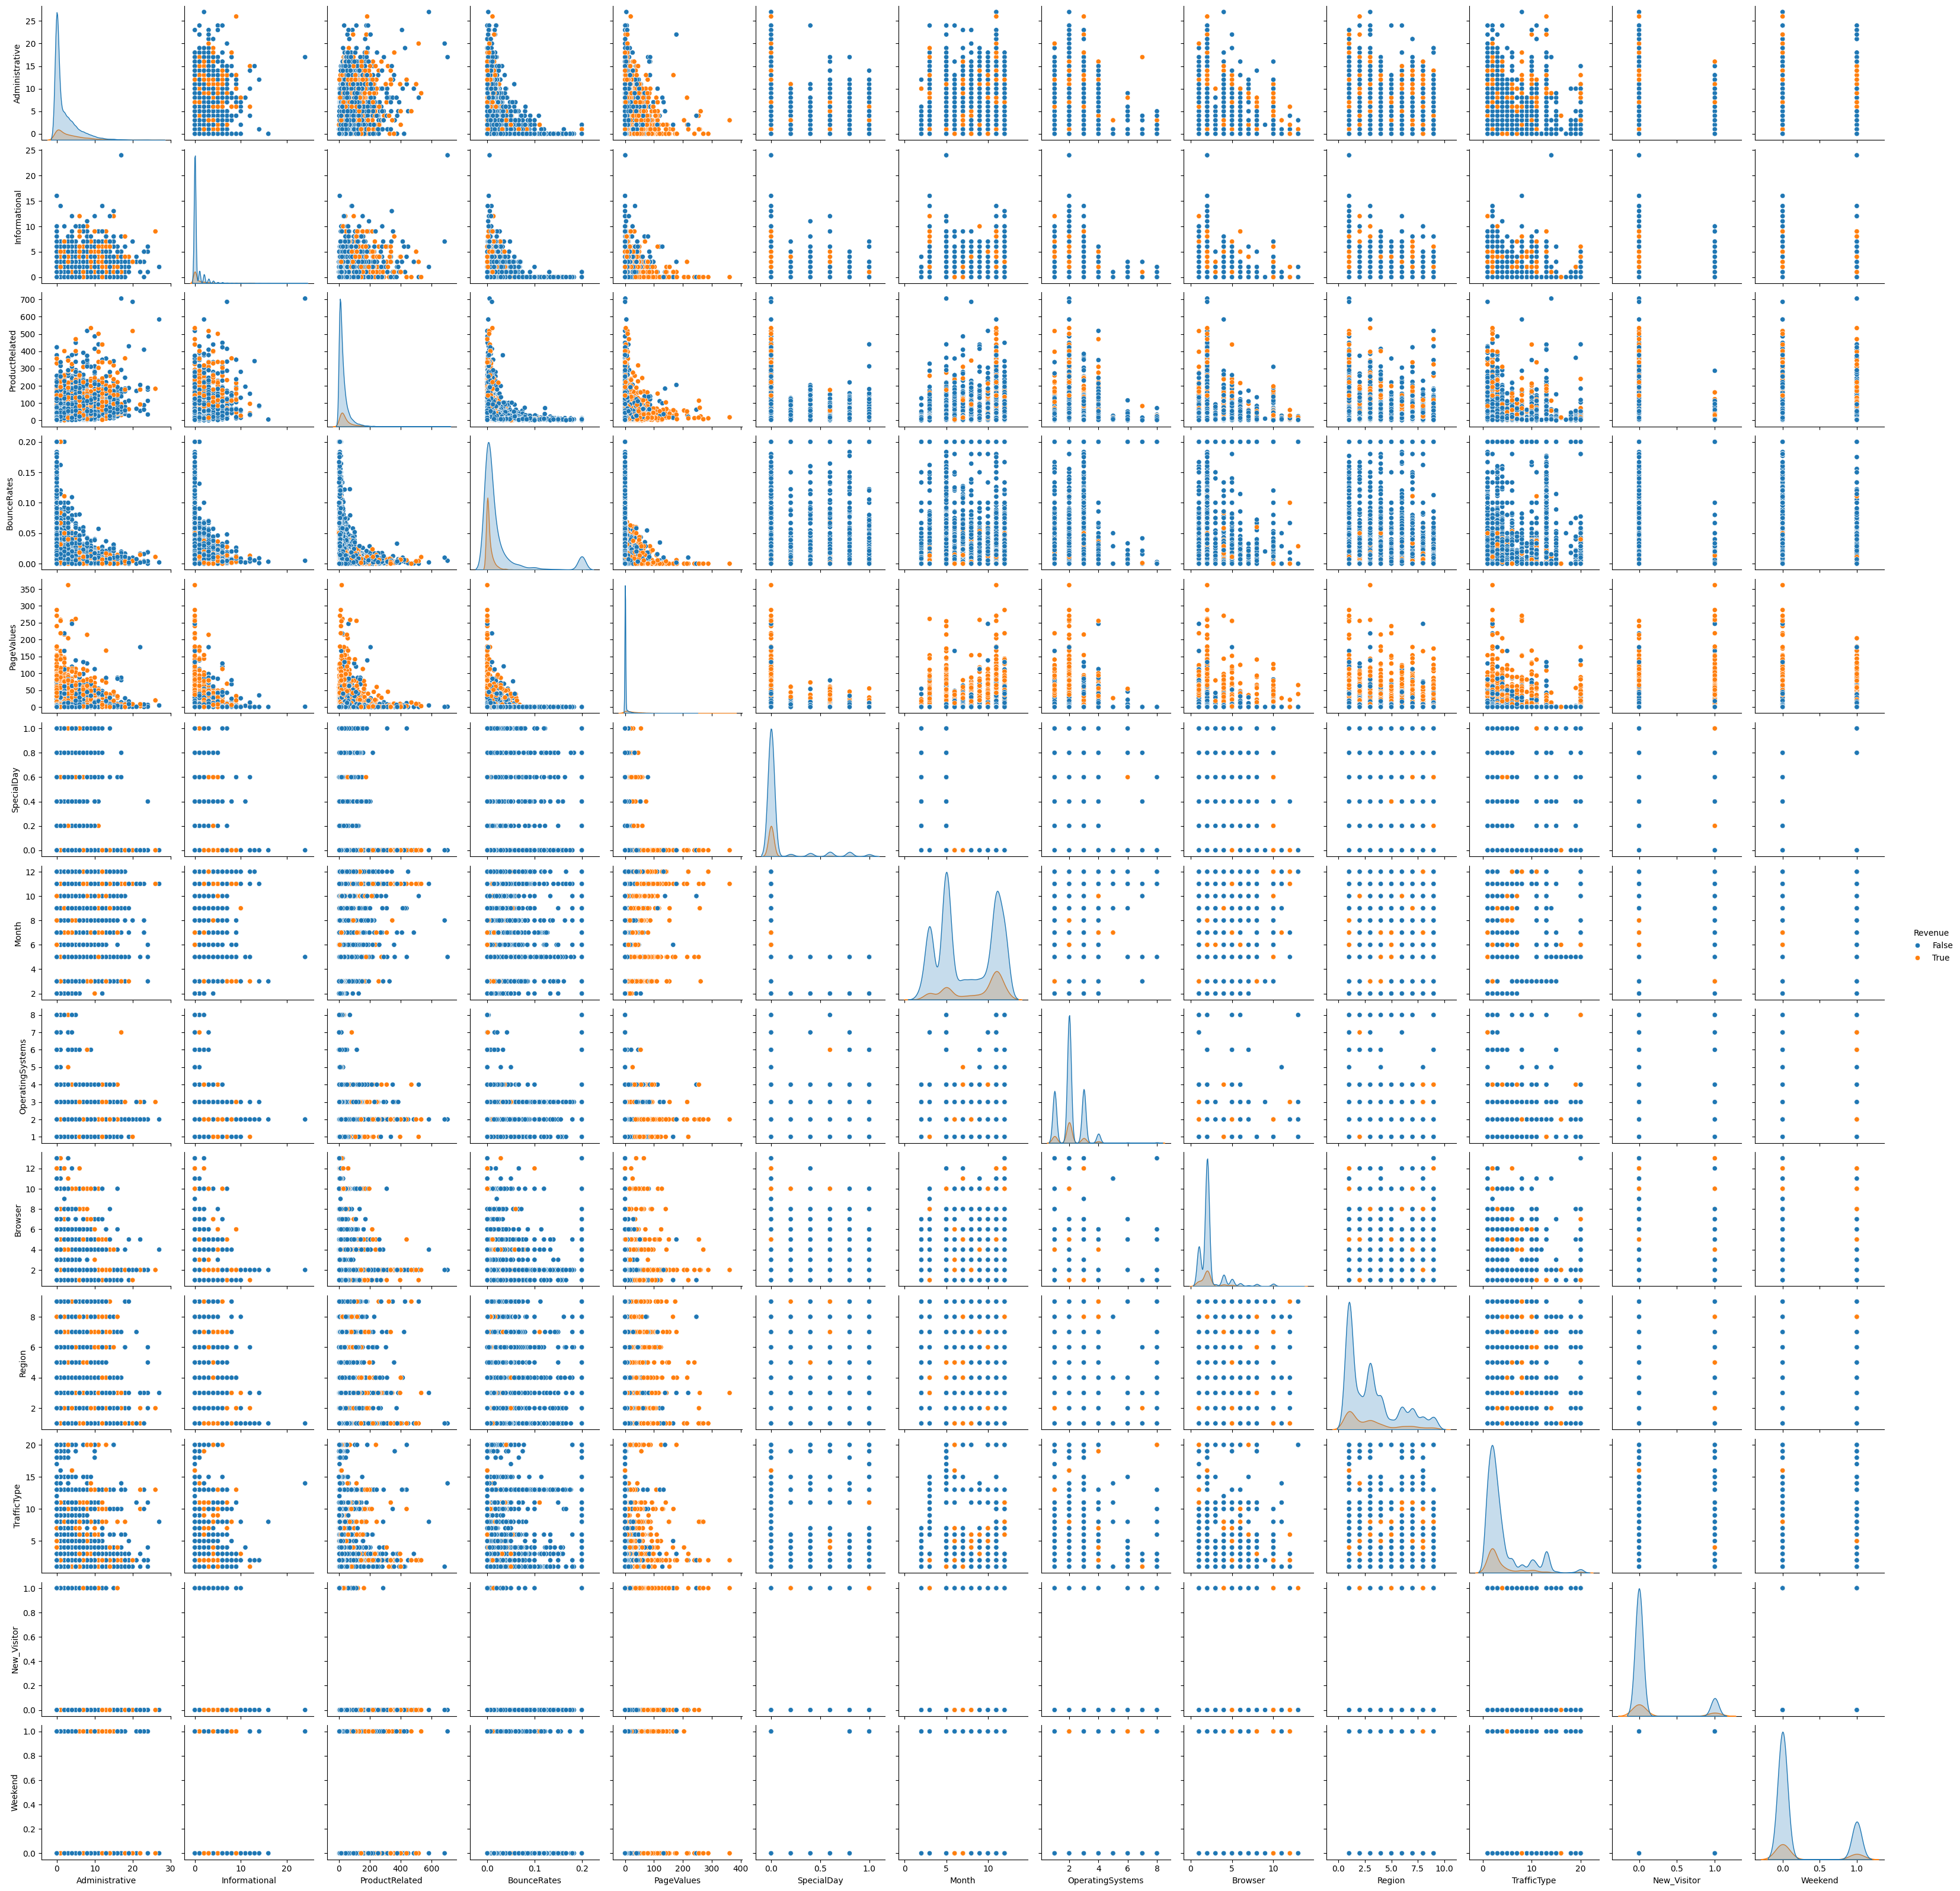

In [15]:
sns.pairplot(df, hue="Revenue")

Notamos de forma confusa duas classificações nesses dados, que muitas vezes podem ser identificadas como apenas uma, ou como mais.

In [18]:
# O resultado pretendido é a compra ou não do produto oferecido
# Separar X e y
X = df.drop("Revenue", axis = 1)
y = df[["Revenue"]]

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.03s/it]


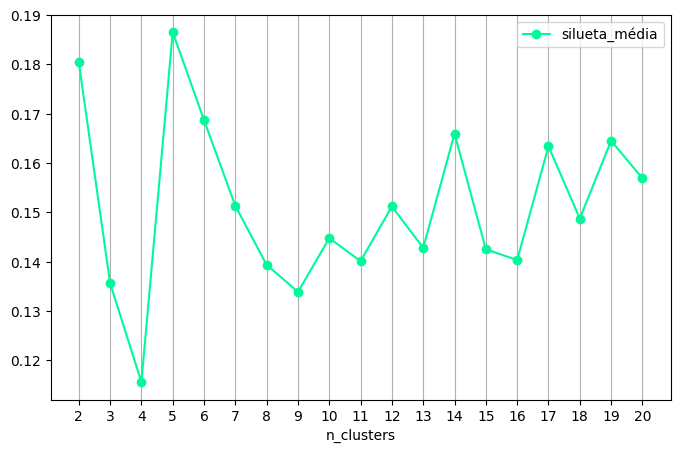

In [19]:
# Criar o gráfico de silhueta

y_cat = pd.Categorical.from_codes(codes=(y-1).values.flatten(), categories =["Revenue"])
y_cat.value_counts()

X_pad = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
X_pad["y"] = y_cat

variaveis = X_pad.columns.drop("y")

# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 20

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # k-means
    km = KMeans(n_clusters=n_clusters).fit(X_pad[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista "siluetas"
    siluetas.append(silhouette_score(X_pad[variaveis], km.labels_))
    # Essa lista define o nome dos grupos
    nomes_grupos = ["grupo_" + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    X_pad["grupos_"+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)


df_silueta = pd.DataFrame({"n_clusters": list(range(2, max_clusters+1)), "silueta_média": siluetas})

df_silueta.plot.line(x = "n_clusters", y = "silueta_média", marker="o", color="#00fa9a", figsize=(8,5))
plt.xticks(list(range(2, max_clusters+1)))
plt.grid(axis = "x")
plt.show()

Melhores valores de clusteres: 5 > 2 > 6 

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [20]:
def kmeans(n):
    if n == 1:
        alg = "lloyd"
    else:
        alg = "elkan"
        
    kmeans = KMeans(n_clusters=n, max_iter=600, algorithm=alg)
    kmeans.fit(df)
    col = f"cluster_{n}"  
    df_copy = df.copy()  
    df_copy[col] = kmeans.labels_

    print(f"Análise Descritiva para {n} Clusters:")
    display(df_copy.groupby(col).mean())  
    display(df_copy[col].value_counts())
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_copy.drop(col, axis=1))
    pca1 = f"pca1_{n}"
    pca2 = f"pca2_{n}"
    
    df_copy[pca1] = X_pca[:, 0]
    df_copy[pca2] = X_pca[:, 1]
        
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(df_copy[pca1], df_copy[pca2], c=df_copy[col], cmap="viridis", alpha=0.6)

    # Criar legenda dos clusters
    handles = []
    cmap = plt.cm.get_cmap("viridis")
    norm = plt.Normalize(vmin=0, vmax=n-1)
    for cluster_num in range(n):
        color = cmap(norm(cluster_num))
        handles.append(mpatches.Patch(color=color, label=f"Cluster {cluster_num}"))
    ax.legend(handles=handles, title="Clusters", loc="best")

    # Criar setas (variáveis projetadas nos componentes principais)
    coeff = pca.components_.T  # Corrigir a orientação
    scaling_factor = np.max(np.abs(X_pca)) * 0.1  # Escala para visualização

    for i in range(coeff.shape[0]):
        ax.arrow(0, 0, coeff[i,0]*scaling_factor, coeff[i,1]*scaling_factor,
                 color='r', alpha=0.7, head_width=0.2, head_length=0.2)
        ax.text(coeff[i,0]*scaling_factor*1.2, coeff[i,1]*scaling_factor*1.2,
                df.columns[i], color='k', ha='center', va='center', fontsize=8)

    ax.grid(True)
    plt.title(f'Clusters ({n}) - PCA Projection', fontsize=14)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

    if n == 1:
        return
    else:
        return df_copy, col

Análise Descritiva para 1 Clusters:


Administrative  Informational  ProductRelated  BounceRates  \
cluster_1                                                               
0                2.321029       0.505839       31.865169     0.022078   

           PageValues  SpecialDay     Month  OperatingSystems   Browser  \
cluster_1                                                                 
0            5.803858    0.061854  7.624091          2.098326  2.311719   

             Region  TrafficType  New_Visitor   Weekend   Revenue  
cluster_1                                                          
0          3.121437     4.002858     0.138342  0.233646  0.154512

cluster_1
0    12245
Name: count, dtype: int64

C:\Users\marin\AppData\Local\Temp\ipykernel_11612\2903895303.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


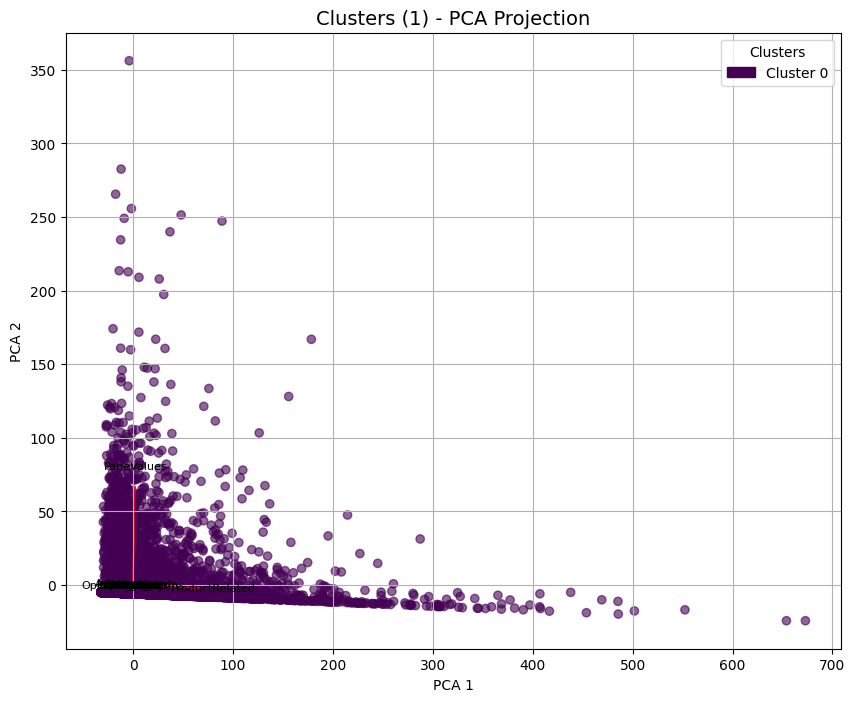

In [21]:
kmeans(1)

Observando esse gráfico, plotado apenas para entendimento do desenho, podemos, visualmente separar os dados estudados em 3 grupos, o primeiro até, aproximadamente X = 25, em que há muitos pontos "altos" na curva. O segundo até aproximadamente X = 270, em que notamos, quase uma linearidade decrescente nos dados extremos, com y máximo, salvo alguns "outsiders". E por último valores em que X é maior que 270, em que os dados se apresentam mais espaços. <br>
Considerando os dados obtidos anteriormente, faremos o estudo com 5, 2 e 6 clusters. 

Análise Descritiva para 5 Clusters:


Administrative  Informational  ProductRelated  BounceRates  \
cluster_5                                                               
0                1.528365       0.277593       13.131023     0.029090   
1                6.303657       1.766296      142.674086     0.005684   
2                2.653226       0.480645       26.580645     0.003275   
3                8.054945       2.934066      341.021978     0.004780   
4                3.711174       0.878983       57.398951     0.007742   

           PageValues  SpecialDay     Month  OperatingSystems   Browser  \
cluster_5                                                                 
0            1.707134    0.065725  7.266556          2.096012  2.313197   
1            7.369364    0.050556  9.302067          2.104928  2.297297   
2           66.502513    0.014194  8.346774          2.030645  2.361290   
3            4.064031    0.021978  9.648352          2.186813  2.175824   
4            4.214286    0.064946  8.158532          2.118193  2.302945   

             Region  TrafficType  New_Visitor   Weekend   Revenue  
cluster_5                                                          
0          3.158438     4.104913     0.158794  0.228697  0.087230  
1          2.769475     3.647059     0.011129  0.227345  0.311606  
2          3.056452     3.920968     0.317742  0.245161  0.791935  
3          2.615385     3.626374     0.010989  0.252747  0.351648  
4          3.119806     3.780557     0.060912  0.248487  0.176684

cluster_5
0    8426
4    2479
1     629
2     620
3      91
Name: count, dtype: int64

C:\Users\marin\AppData\Local\Temp\ipykernel_11612\2903895303.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


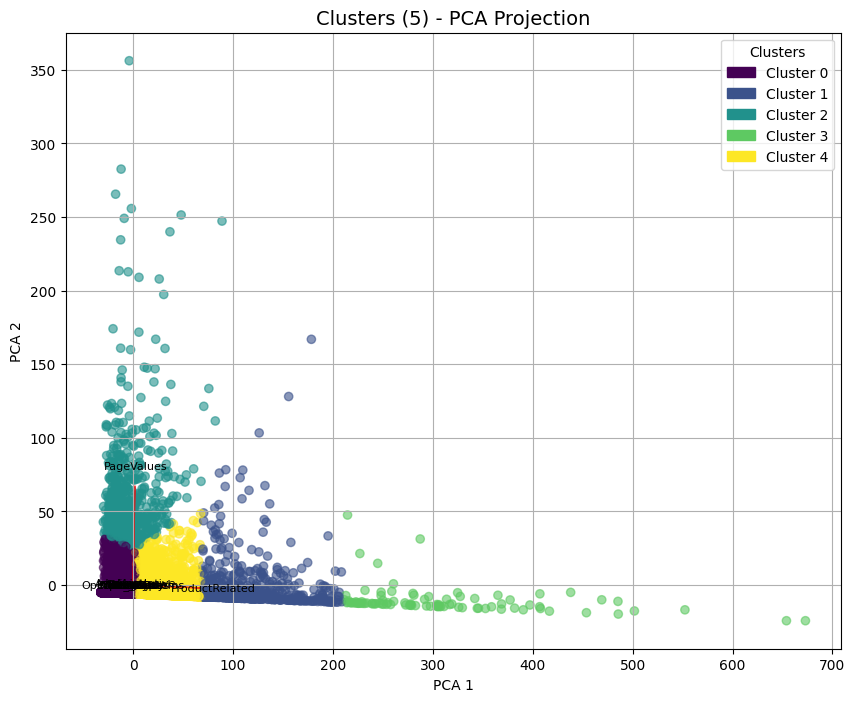

In [22]:
df_5, col_5 = kmeans(5)

O resultado obtido com 5 clusters apresenta uma grande desigualdade na quantidade de valores divididos entre os grupos (8426 x 91), tornando a interpretação visual dos dados pouco clara, havendo uma sobreposição dos agrupamentos. Entretanto, há uma clara diferença entre os valores médios encontrados para ambos os clusteres, destacando-se os valores de ProductRelated e PageValues. Em relação aos valores de New_Visitor e Weekend, inicialmente classificados como booleans, podemos notar que para o primeiro há uma grande distinção entre seus valores, enquanto para o segundo não há grande variabilidade, mas eles continuam são persistentementes próximos de 0, ou seja podemos considerá-los como "False". Já em relação ao Revenue que segue a mesma caracterítica vemos uma grande variabilidade em seus valores, destacando-se o cluster 2 em que o valor é muito próximo de 0,8, podendo considerálo como "True".<br>
Cluster 0: Menor Valor de Revenue<br>
Cluster 1: Valores Médios<br>
Cluster 2: Revenue True<br>
Cluster 3: Muitas Visitas à Páginas Relacionadas a Produtos<br>
Cluster 4: Valores Baixos

Análise Descritiva para 2 Clusters:


Administrative  Informational  ProductRelated  BounceRates  \
cluster_2                                                               
0                1.998755       0.395341       21.681842      0.02352   
1                5.948949       1.749750      146.501502      0.00584   

           PageValues  SpecialDay     Month  OperatingSystems   Browser  \
cluster_2                                                                 
0            5.675815    0.063062  7.484439          2.095767  2.315757   
1            7.245274    0.048248  9.196196          2.127127  2.266266   

             Region  TrafficType  New_Visitor   Weekend   Revenue  
cluster_2                                                          
0          3.142362     4.032990     0.148586  0.232972  0.142717  
1          2.885886     3.663664     0.023023  0.241241  0.287287

cluster_2
0    11246
1      999
Name: count, dtype: int64

C:\Users\marin\AppData\Local\Temp\ipykernel_11612\2903895303.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


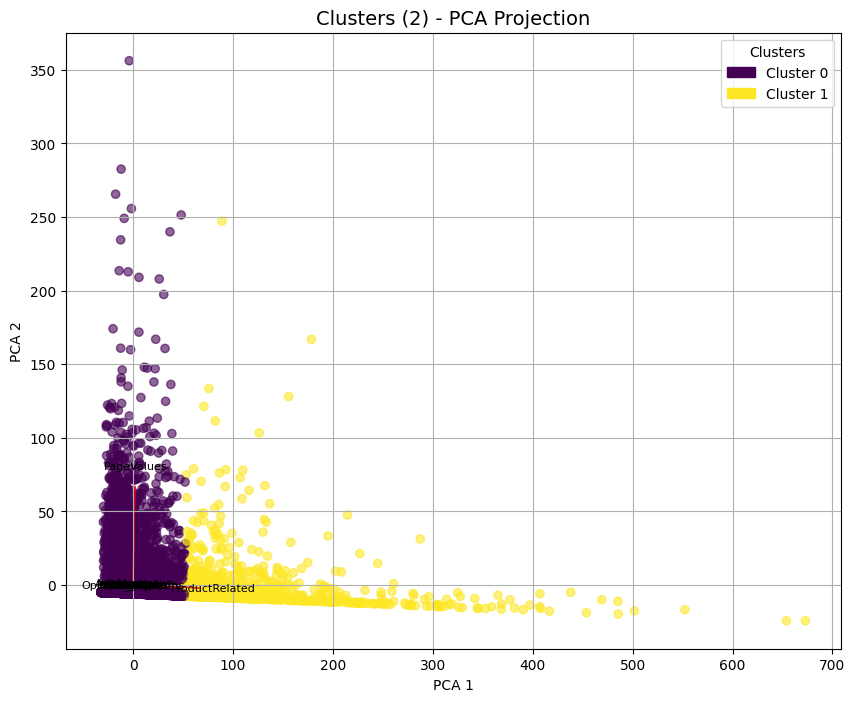

In [23]:
df_2, col_2 = kmeans(2)

O gráfico para 2 clusteres apresenta uma pior divisão visual, havendo mais  sobreposição dos grupos, quando comparado ao de 5 clusters. Entretanto, há uma menor diferença na separação dos dados, anteriormente sendo de 8426 para 91 (92x maior) e agora de 11246 para 999 (11x maior). Em relação ao estudo de variabilidade de variáveis, ele consitnua sendo similar ao apresnetao anteriormente, apesar de haver uma maior variaçãos dos resultados obtidos uma vez que há menos clusters a serem analisados. Também devemos considerar que não há um cluster de resultado mais positivo para Revenue nessa análise.<br>
Cluster 0: Poucas Visitas à Páginas em Geral<br>
Cluster 1: Muitas Visitas à Quaisquer Páginas

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [25]:
# Observando o resultado anterior sabemos que o melhor obtido será para os valores de 5 clusters:
print("Para 5 clusters")
display(df_5.groupby(col_5)[['BounceRates', 'Revenue']].mean())

Para 5 clusters


BounceRates   Revenue
cluster_5                       
0             0.029090  0.087230
1             0.005684  0.311606
2             0.003275  0.791935
3             0.004780  0.351648
4             0.007742  0.176684

Percebemos nessa análise que o melhor resultado para a nálise que queremos alcançar com esse estudo é o do Cluster 2, mostrado anteriormente, com o mais alto valor de revenue encontrado e o mais baiso de BounceRates.